# Linear Regression
This notebook analyzes the diabetes dataset using simple linear regression for each feature.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import pandas as pd

%matplotlib inline

## Load and Explore the Dataset
The diabetes dataset includes:
- Ten baseline variables
- Age, sex, body mass index
- Average blood pressure
- Six blood serum measurements
- Target: quantitative measure of disease progression one year after baseline

In [2]:
ds = load_diabetes()
print("Dataset shape:", ds.data.shape)
print("\nFeature names:", ds.feature_names)

Dataset shape: (442, 10)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Linear Regression Implementation
Implementation of simple linear regression ($y = mx + b$) using analytical solution:

The objective is to minimize:

$$ \min_{m,b} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

Where:
$$ \hat{y_i} = mx_i + b $$

Taking partial derivatives, and setting them to 0 to find the m, b that minimizes the objective function:
$$
    \begin{align*}
        \frac{\partial}{\partial m} &= \sum_{i=1}^{n} x_iy_i - m\sum_{i=1}^{n} x_i^2 - b\sum_{i=1}^{n} x_i = 0 \\
        \frac{\partial}{\partial b} &= \sum_{i=1}^{n} y_i - m\sum_{i=1}^{n} x_i - nb = 0 
    \end{align*}
$$
This gives us a system of two equations:
$$
    
    \begin{align*}
        \sum_{i=1}^{n} x_iy_i &= m\sum_{i=1}^{n} x_i^2 + b\sum_{i=1}^{n} x_i \\
        \sum_{i=1}^{n} y_i &= m\sum_{i=1}^{n} x_i + nb
    \end{align*}
$$
$$
    \begin{align*}
        m &= \frac{n\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\sum_{i=1}^{n} y_i}{n\sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2} \\
        b &= \frac{\sum_{i=1}^{n} y_i - m\sum_{i=1}^{n} x_i}{n}
    \end{align*}
$$

In [3]:
def compute_linear_reg_line(feature_idx):
    """Compute and plot linear regression line for a given feature.

    Args:
        feature_idx (int): Index of the feature to analyze
    """
    X = ds.data[:, feature_idx]
    Y = ds.target

    # Calculate regression coefficients
    n = len(X)
    sum_xy = sum(X * Y)
    sum_x = sum(X)
    sum_y = sum(Y)
    sum_x_squared = sum(X**2)

    # Calculate slope (m) and intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / n

    # Calculate predicted values
    y_hat = m * X + b

    # Create plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X, y=y_hat, color="blue", label="Predicted")
    sns.scatterplot(x=X, y=Y, color="red", label="Actual")

    plt.xlabel(f"Feature: {ds.feature_names[feature_idx]}")
    plt.ylabel("Disease Progression")
    plt.title(f"Linear Regression Analysis: {ds.feature_names[feature_idx]}")

    # Add regression equation to plot
    equation = f"y = {m:.2f}x + {b:.2f}"
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes)

    plt.show()

    return m, b

## Analyze Each Feature
Compute and visualize linear regression for each feature in the dataset


Analyzing feature: age


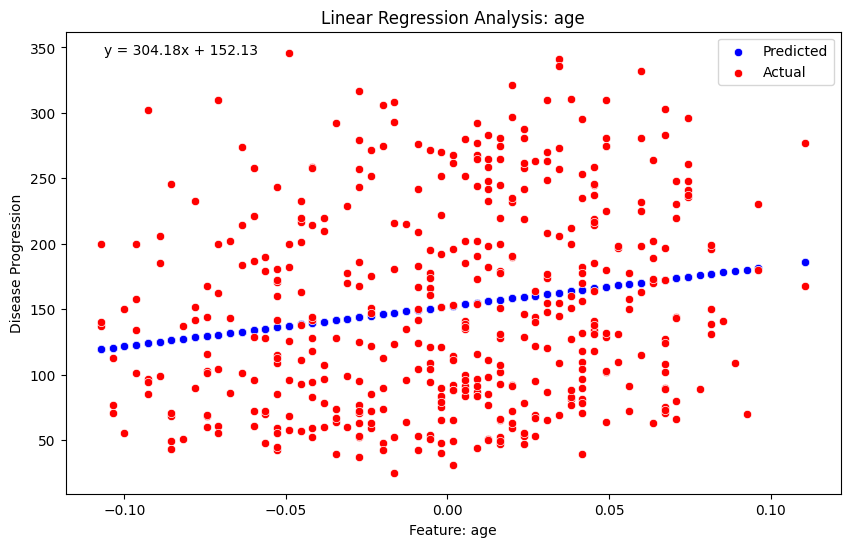


Analyzing feature: sex


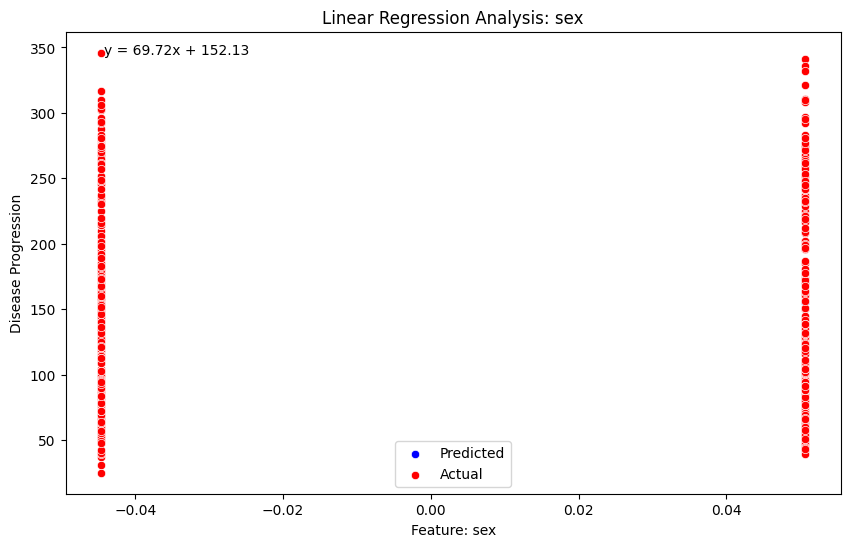


Analyzing feature: bmi


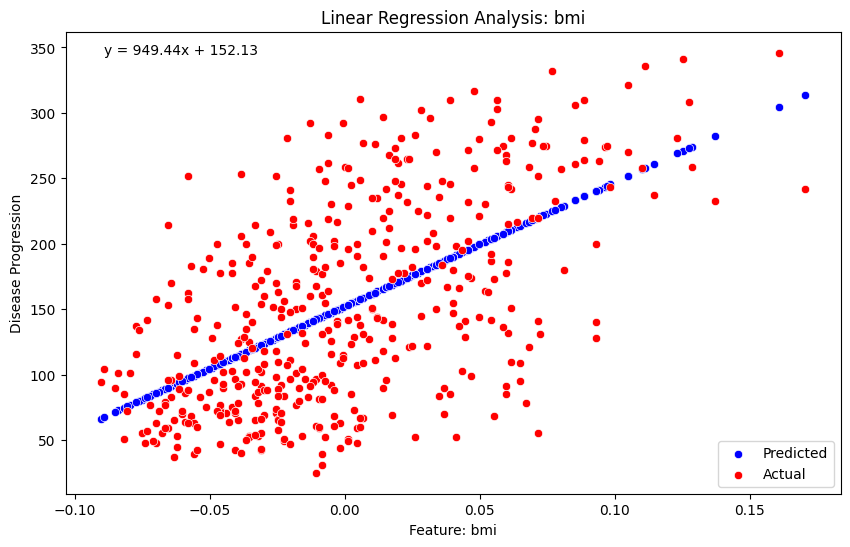


Analyzing feature: bp


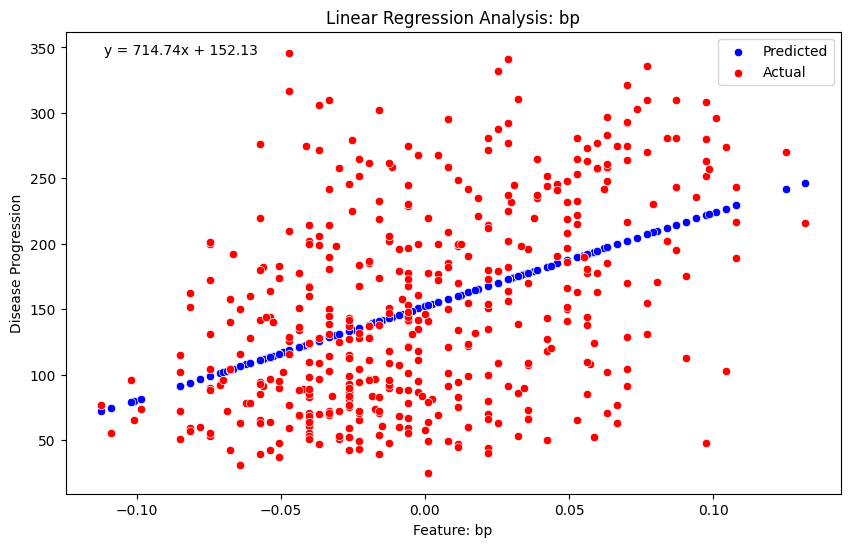


Analyzing feature: s1


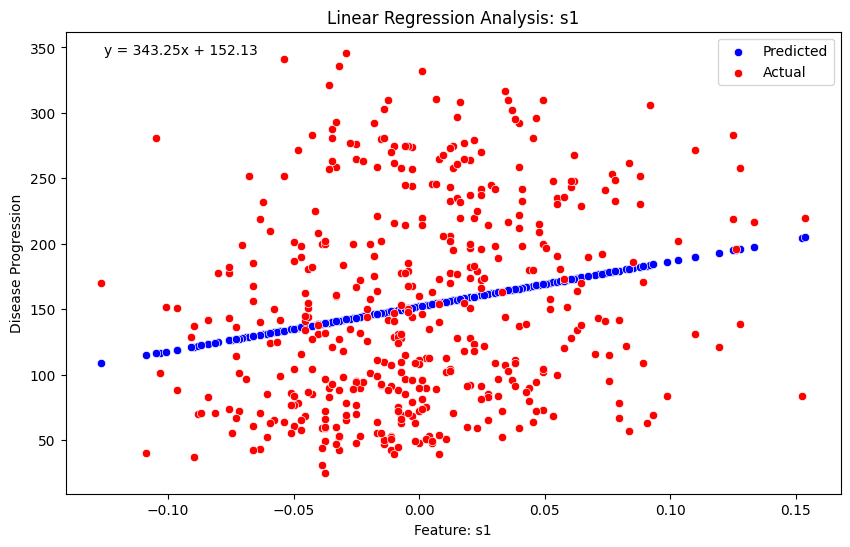


Analyzing feature: s2


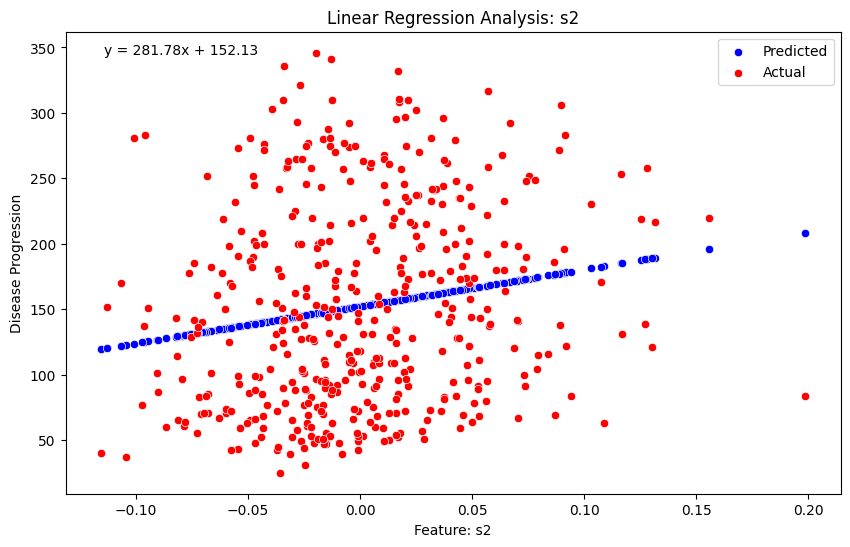


Analyzing feature: s3


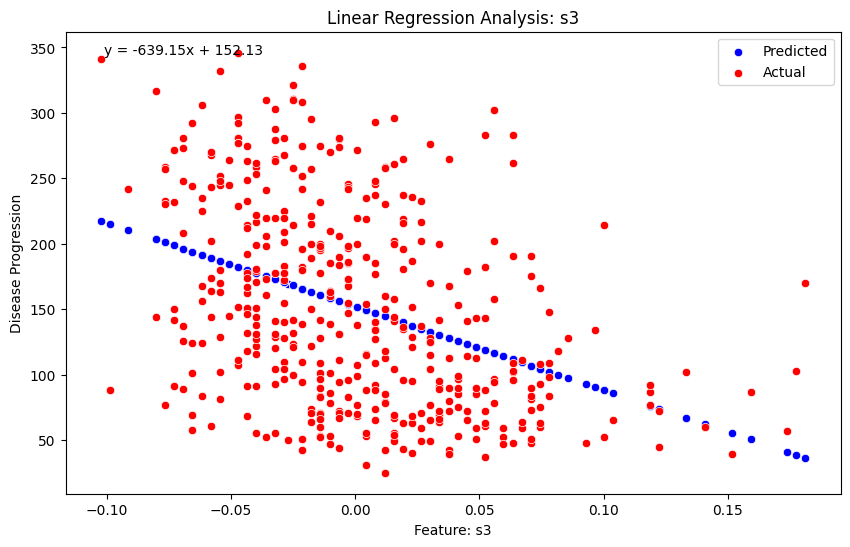


Analyzing feature: s4


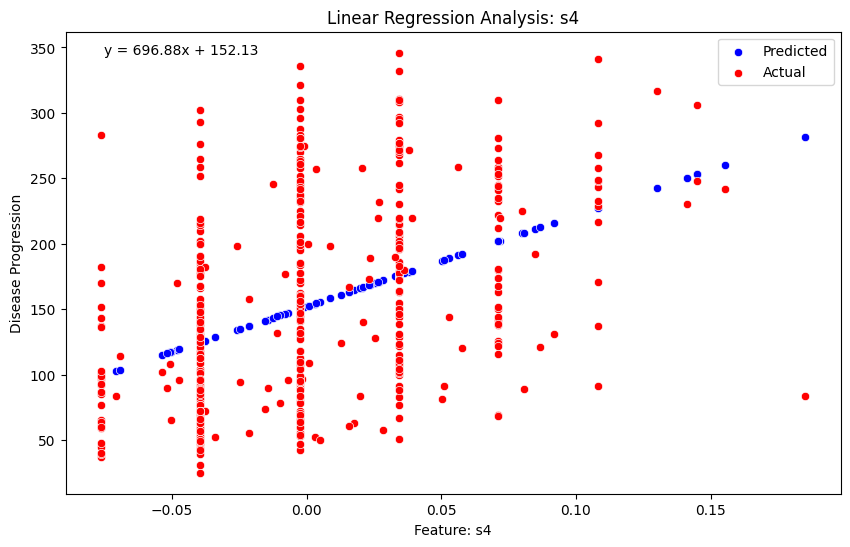


Analyzing feature: s5


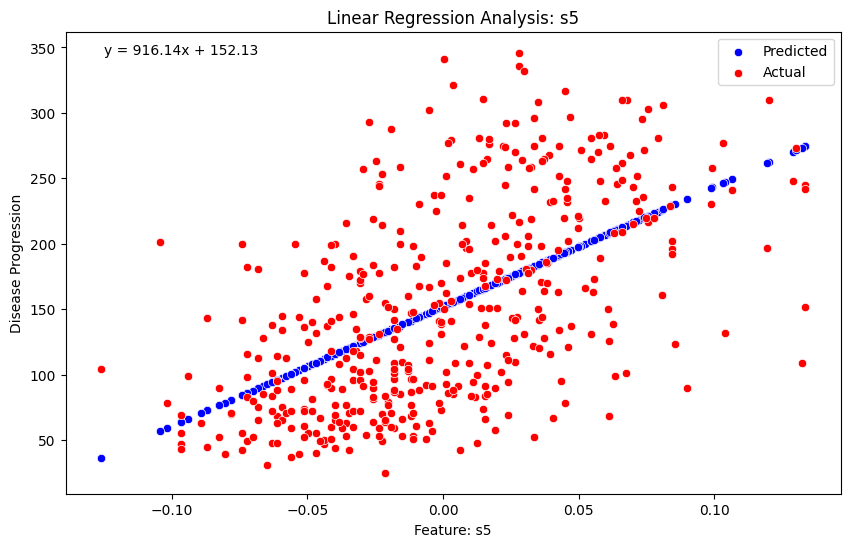


Analyzing feature: s6


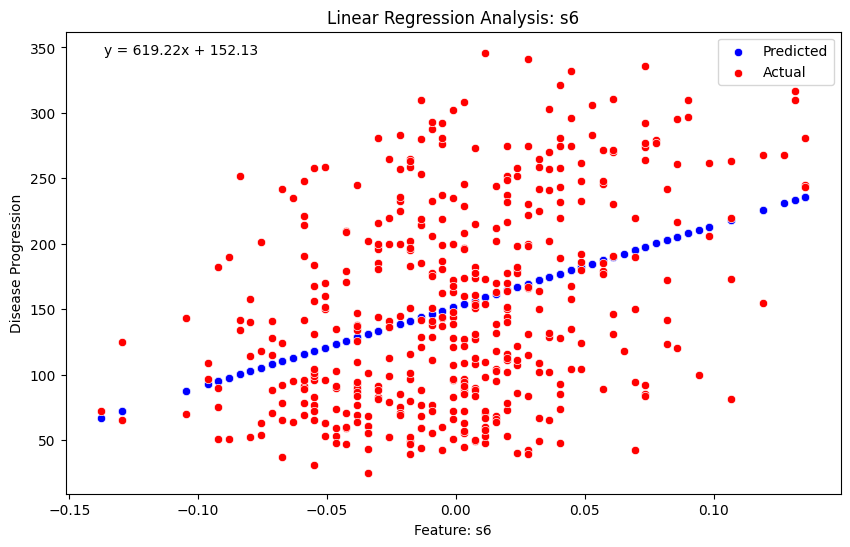

In [4]:
# Store results for all features
results = []

for i in range(ds.data.shape[1]):
    print(f"\nAnalyzing feature: {ds.feature_names[i]}")
    m, b = compute_linear_reg_line(i)
    results.append({"feature": ds.feature_names[i], "slope": m, "intercept": b})

## Summary of Results
Display summary of regression coefficients for all features

In [5]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("slope", ascending=False)
print("Features sorted by impact (slope magnitude):")
display(results_df)

Features sorted by impact (slope magnitude):


,feature,slope,intercept
2,bmi,949.435260,152.133484
8,s5,916.137375,152.133484
3,bp,714.738259,152.133484
7,s4,696.883030,152.133484
9,s6,619.222821,152.133484
4,s1,343.254452,152.133484
0,age,304.183075,152.133484
5,s2,281.784593,152.133484
1,sex,69.715356,152.133484
6,s3,-639.145279,152.133484
